# UoG-DA_Group28 Jupyter Notebook: Classification - K-Nearest Neighbour (KNN)

<hr>

## <u> Initial Setup </u>

In [38]:
from utils import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# load the Datasets
dataset_1 = load_from_pickle("cir_ncir_agg.pkl", "./pickled_data_sets")
dataset_2 = load_from_pickle("cir_ncir_pca.pkl", "./pickled_data_sets")

## <u> Training and Analysis </u>

### <b> Dataset: cir_ncir_agg </b>

#### 70:30 vs 80:20 split

We will first look to split the dataset into 2 further subsets to look at the effects of 2 common 'training' : 'testing' data ratio splits: 
- 70 : 30 
- 80 : 20

In [39]:
# Select the features to be used for Classification
X = dataset_1.drop(columns = 'NLOS')
Y = dataset_1[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
X_train_70_30, X_test_70_30, Y_train_70_30, Y_test_70_30 = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)

# Create the Training and Test set with split 80:20 
X_train_80_20, X_test_80_20, Y_train_80_20, Y_test_80_20 = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

In [40]:
training_accuracy = []
testing_accuracy = []

#### Parameter tuning and Training vs Testing Accuracy

We will first look to train and plot the K Neighbout model based on several `n_neighbors` for both 70:30 and 80:20 dataset splits in order to obtain the most optimal results

Other parameters will follow the defaults provided in previous lab exercises:

- `metric` : `minkowski` Minikowski Distance
- `p` : `2` Minikowski P order to derive Euclidean Distance 

Number of Nearest Neighbours:  1
Training Accuracy:  1.0
Testing Accuracy:  0.8587301587301587
Number of Nearest Neighbours:  5
Training Accuracy:  0.9157823129251701
Testing Accuracy:  0.8878571428571429
Number of Nearest Neighbours:  10
Training Accuracy:  0.9000340136054422
Testing Accuracy:  0.8854761904761905
Number of Nearest Neighbours:  15
Training Accuracy:  0.8974149659863946
Testing Accuracy:  0.8859523809523809
Number of Nearest Neighbours:  20
Training Accuracy:  0.8934693877551021
Testing Accuracy:  0.8861111111111111
Number of Nearest Neighbours:  25
Training Accuracy:  0.8916326530612245
Testing Accuracy:  0.8869047619047619
Number of Nearest Neighbours:  30
Training Accuracy:  0.8888095238095238
Testing Accuracy:  0.8852380952380953
Number of Nearest Neighbours:  35
Training Accuracy:  0.8881292517006802
Testing Accuracy:  0.8859523809523809
Number of Nearest Neighbours:  40
Training Accuracy:  0.8860544217687075
Testing Accuracy:  0.8837301587301587
Number of Nearest 

Text(0, 0.5, 'Accuracy')

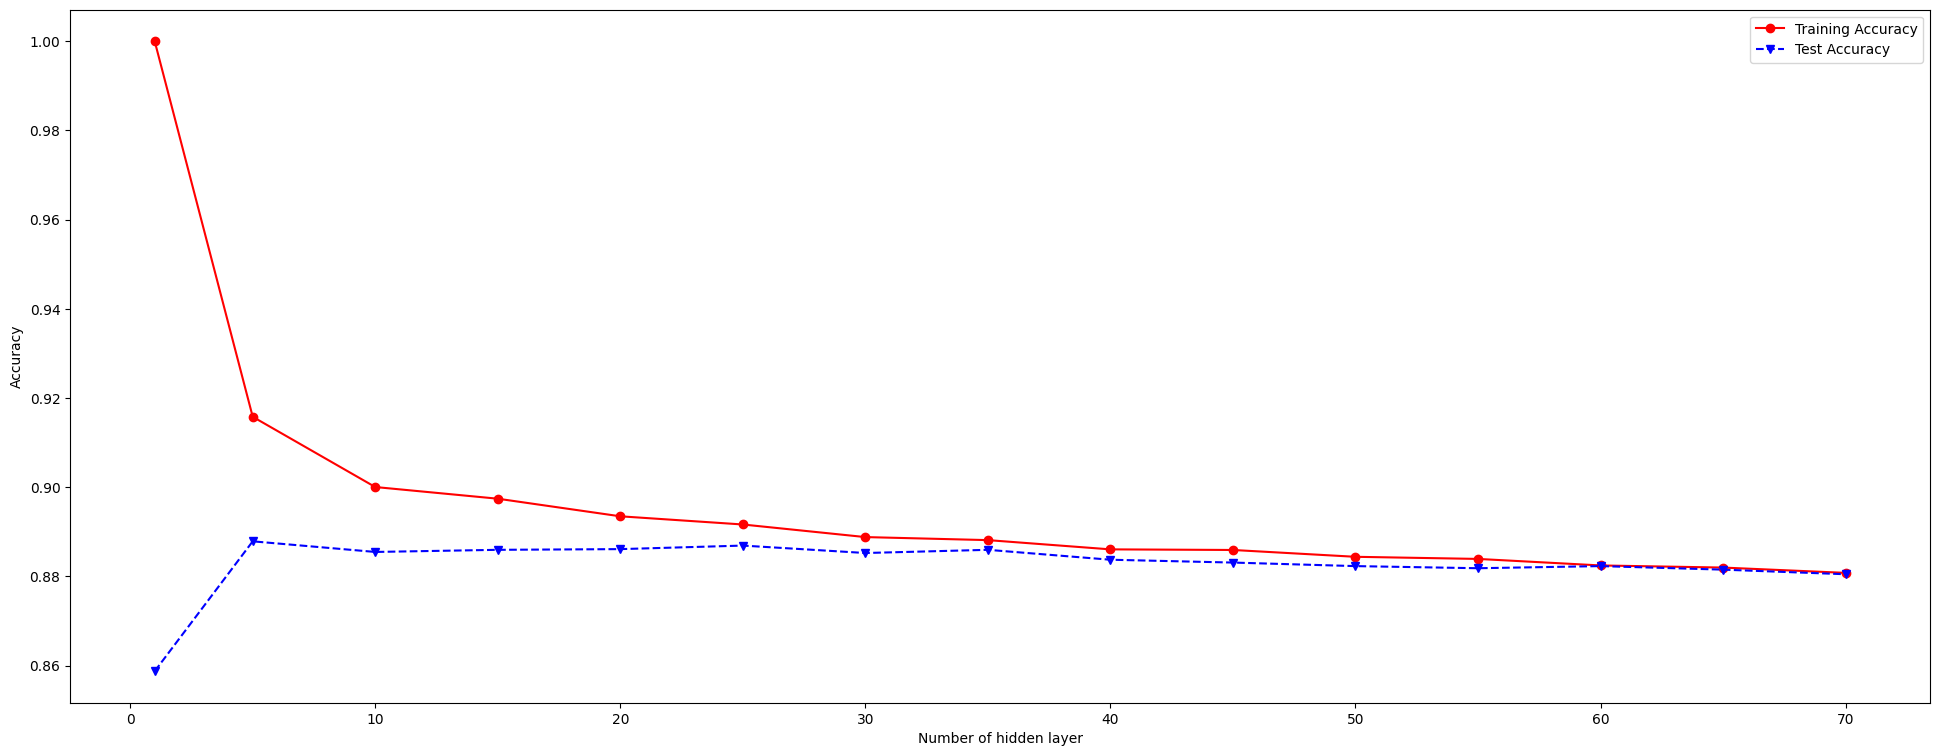

In [41]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

numNeighbors = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train_70_30, Y_train_70_30)
    Y_predTrain = clf.predict(X_train_70_30)
    Y_predTest = clf.predict(X_test_70_30)
    trainAcc.append(accuracy_score(Y_train_70_30, Y_predTrain))
    testAcc.append(accuracy_score(Y_test_70_30, Y_predTest))
    print("Number of Nearest Neighbours: ", k)
    print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))

###########################################################################
# Plot training and test accuracies
##########################################################################
plt.figure(figsize = (24, 9))
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

Number of Nearest Neighbours:  1
Training Accuracy:  1.0
Testing Accuracy:  0.8572619047619048
Number of Nearest Neighbours:  5
Training Accuracy:  0.9166964285714285
Testing Accuracy:  0.8892857142857142
Number of Nearest Neighbours:  10
Training Accuracy:  0.9007440476190476
Testing Accuracy:  0.8891666666666667
Number of Nearest Neighbours:  15
Training Accuracy:  0.898720238095238
Testing Accuracy:  0.8867857142857143
Number of Nearest Neighbours:  20
Training Accuracy:  0.8935714285714286
Testing Accuracy:  0.8869047619047619
Number of Nearest Neighbours:  25
Training Accuracy:  0.893154761904762
Testing Accuracy:  0.8873809523809524
Number of Nearest Neighbours:  30
Training Accuracy:  0.8902976190476191
Testing Accuracy:  0.8848809523809524
Number of Nearest Neighbours:  35
Training Accuracy:  0.8896428571428572
Testing Accuracy:  0.8867857142857143
Number of Nearest Neighbours:  40
Training Accuracy:  0.8872321428571428
Testing Accuracy:  0.8852380952380953
Number of Nearest Ne

Text(0, 0.5, 'Accuracy')

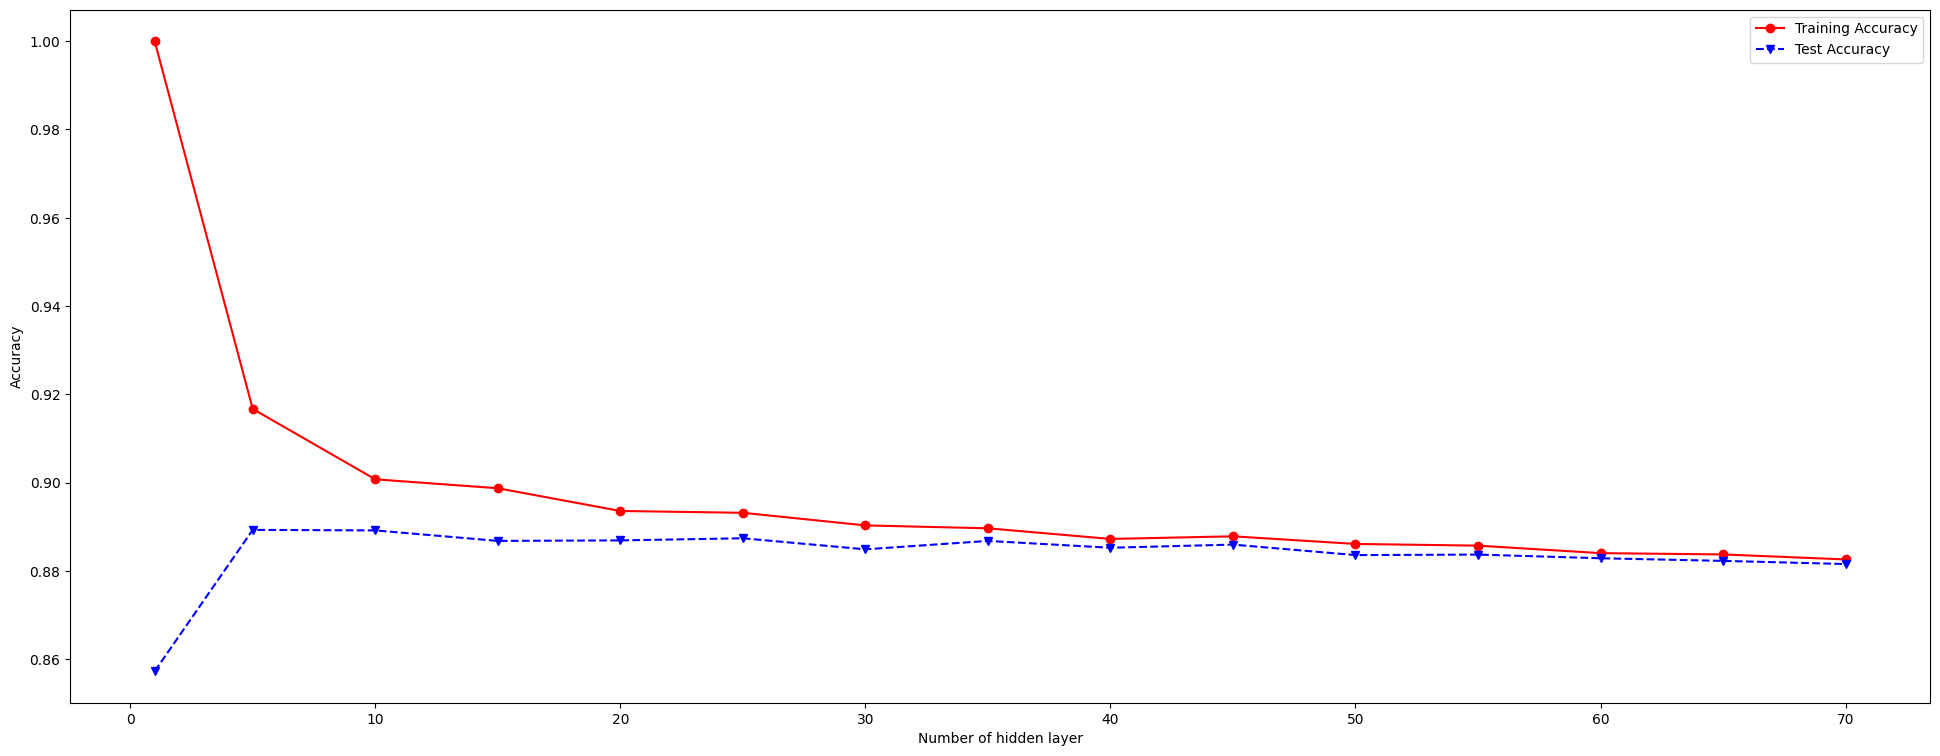

In [42]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

numNeighbors = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train_80_20, Y_train_80_20)
    Y_predTrain = clf.predict(X_train_80_20)
    Y_predTest = clf.predict(X_test_80_20)
    trainAcc.append(accuracy_score(Y_train_80_20, Y_predTrain))
    testAcc.append(accuracy_score(Y_test_80_20, Y_predTest))
    print("Number of Nearest Neighbours: ", k)
    print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))

###########################################################################
# Plot training and test accuracies
##########################################################################
plt.figure(figsize = (24, 9))
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

#### Model Training and Assessment

From the 70:30 and 80:20 splits, we can observe gradual convergence for both 'Training Accuracy' and 'Test Accuracy', with the `numNeighbors` that produces higher 'Test Accuracy' scores being `25` for both the 70:30 split and for the 80:20
- `n_neighbors` : `25`

We will then utilize a confusion matrix as well as classification report to perform an analysis of the model's accuracy based on several metrics (information obtained from [1][2]):
- `accuracy` : The proportion of all classifications that were correct, whether positive or negative
- `precision` : The proportion of all the model's positive classifications that are actually positive
- `recall` :  The proportion of all actual positives that were classified correctly as positives
- `f1-score` : The harmonic mean (a kind of average) of precision and recall, accounts for class-imbalances in dataset

For convenience sake we will utilize the `classification_report` function from the `sklearn.metrics`, which will not only break it down by these metrics by class but also provides us with the `Support` (i.e how many samples are in each class) alongside the `macro avg` (Averages for each class without considering class imbalance) and `weighted avg`(Averages for each class considers class imbalance)

In [43]:
k = 25

clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
clf.fit(X_train_70_30, Y_train_70_30)
Y_predTrain = clf.predict(X_train_70_30)
Y_predTest = clf.predict(X_test_70_30)
print("Number of Nearest Neighbours: ", k)
print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))

training_accuracy.append(accuracy_score(Y_train_70_30, Y_predTrain))
testing_accuracy.append(accuracy_score(Y_test_70_30, Y_predTest))

Number of Nearest Neighbours:  25
Training Accuracy:  0.8916326530612245
Testing Accuracy:  0.8869047619047619


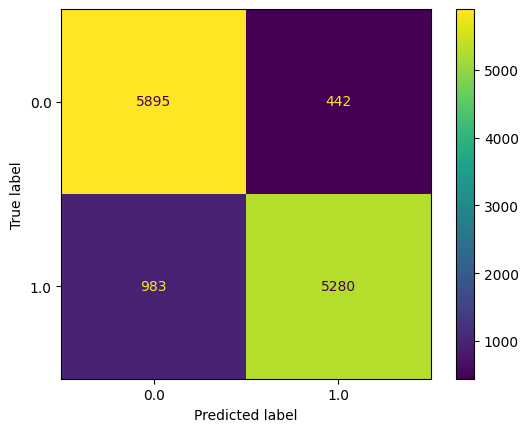

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      6337
         1.0       0.92      0.84      0.88      6263

    accuracy                           0.89     12600
   macro avg       0.89      0.89      0.89     12600
weighted avg       0.89      0.89      0.89     12600



In [44]:
predictions = clf.predict(X_test_70_30)
cm = confusion_matrix(Y_test_70_30, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_70_30, predictions)
print(report)

In [45]:
clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
clf.fit(X_train_80_20, Y_train_80_20)
Y_predTrain = clf.predict(X_train_80_20)
Y_predTest = clf.predict(X_test_80_20)
print("Number of Nearest Neighbours: ", k)
print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))

training_accuracy.append(accuracy_score(Y_train_80_20, Y_predTrain))
testing_accuracy.append(accuracy_score(Y_test_80_20, Y_predTest))

Number of Nearest Neighbours:  25
Training Accuracy:  0.893154761904762
Testing Accuracy:  0.8873809523809524


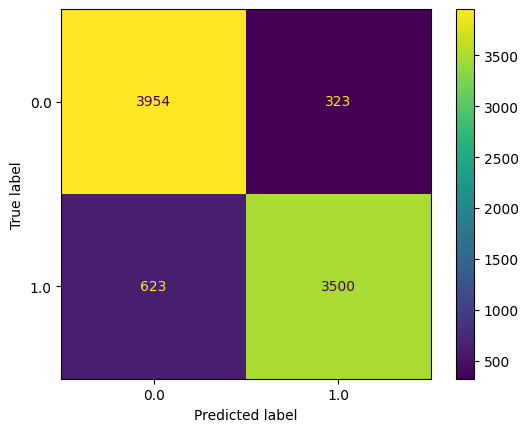

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      4277
         1.0       0.92      0.85      0.88      4123

    accuracy                           0.89      8400
   macro avg       0.89      0.89      0.89      8400
weighted avg       0.89      0.89      0.89      8400



In [46]:
predictions = clf.predict(X_test_80_20)
cm = confusion_matrix(Y_test_80_20, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_80_20, predictions)
print(report)

### <b> Dataset: cir_ncir_pca </b>

#### 70:30 vs 80:20 split

We will first look to split the dataset into 2 further subsets to look at the effects of 2 common 'training' : 'testing' data ratio splits: 
- 70 : 30 
- 80 : 20

In [47]:
# Select the features to be used for Classification
X = dataset_2.drop(columns = 'NLOS')
Y = dataset_2[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
X_train_70_30, X_test_70_30, Y_train_70_30, Y_test_70_30 = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)

# Create the Training and Test set with split 80:20 
X_train_80_20, X_test_80_20, Y_train_80_20, Y_test_80_20 = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

#### Parameter tuning and Training vs Testing Accuracy

We will first look to train and plot the K Neighbout model based on several `n_neighbors` for both 70:30 and 80:20 dataset splits in order to obtain the most optimal results

Other parameters will follow the defaults provided in previous lab exercises:

- `metric` : `minkowski` Minikowski Distance
- `p` : `2` Minikowski P order to derive Euclidean Distance 

Number of Nearest Neighbours:  1
Training Accuracy:  1.0
Testing Accuracy:  0.8136507936507936
Number of Nearest Neighbours:  5
Training Accuracy:  0.9008503401360545
Testing Accuracy:  0.8574603174603175
Number of Nearest Neighbours:  10
Training Accuracy:  0.8848299319727891
Testing Accuracy:  0.866984126984127
Number of Nearest Neighbours:  15
Training Accuracy:  0.8820068027210884
Testing Accuracy:  0.8686507936507937
Number of Nearest Neighbours:  20
Training Accuracy:  0.8781632653061224
Testing Accuracy:  0.8690476190476191
Number of Nearest Neighbours:  25
Training Accuracy:  0.8772108843537415
Testing Accuracy:  0.8698412698412699
Number of Nearest Neighbours:  30
Training Accuracy:  0.8752040816326531
Testing Accuracy:  0.8691269841269841
Number of Nearest Neighbours:  35
Training Accuracy:  0.8764625850340136
Testing Accuracy:  0.8700793650793651
Number of Nearest Neighbours:  40
Training Accuracy:  0.8735714285714286
Testing Accuracy:  0.8681746031746032
Number of Nearest N

Text(0, 0.5, 'Accuracy')

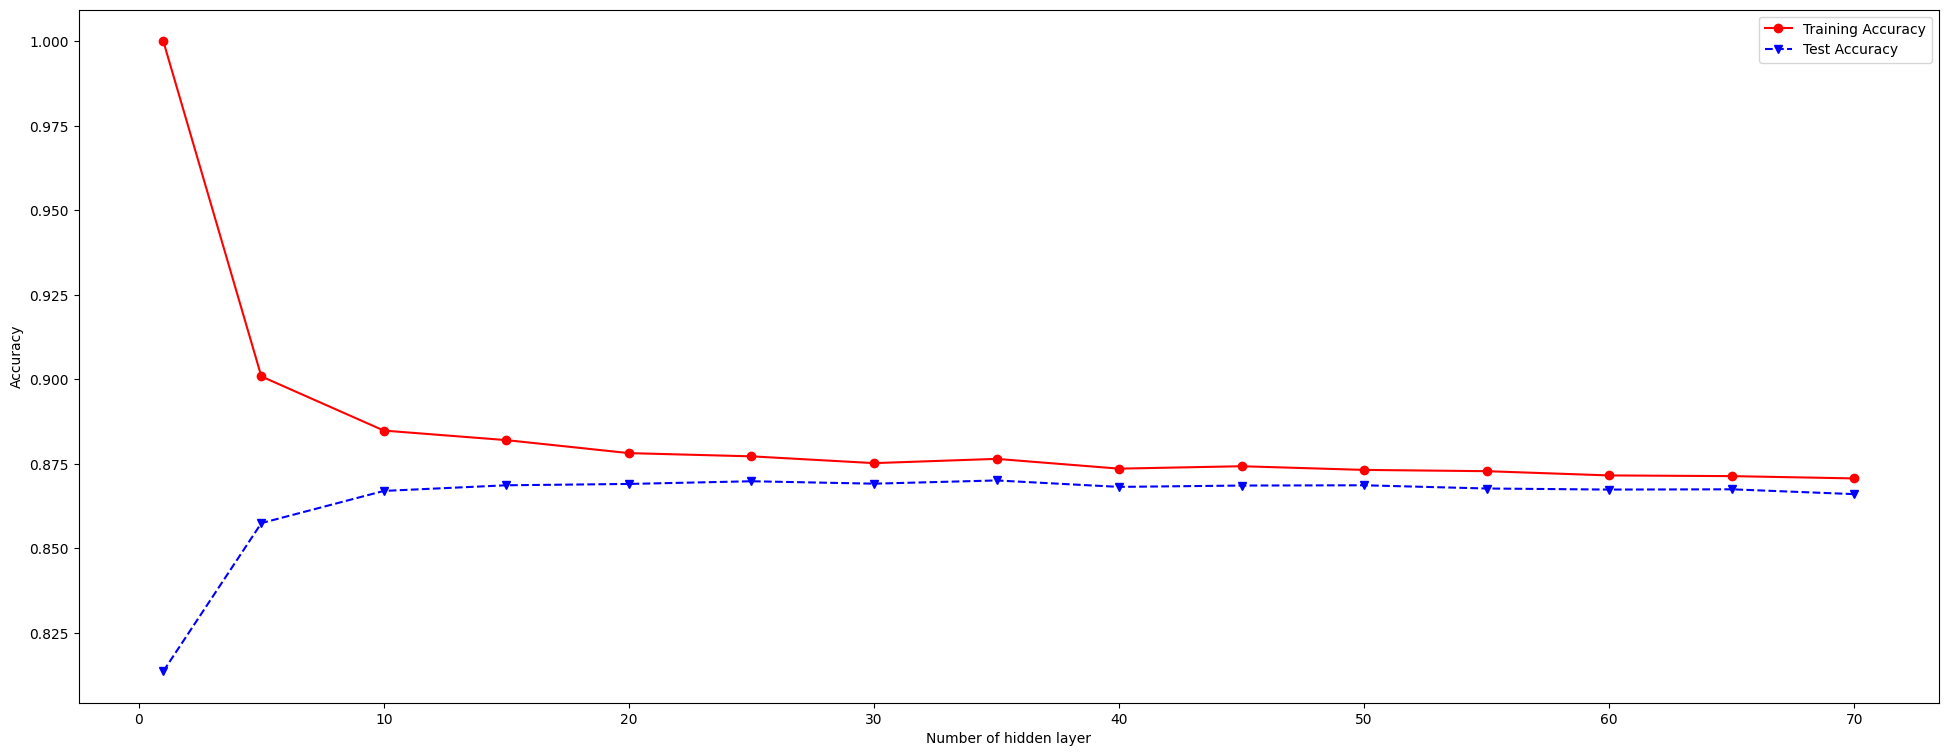

In [48]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

numNeighbors = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train_70_30, Y_train_70_30)
    Y_predTrain = clf.predict(X_train_70_30)
    Y_predTest = clf.predict(X_test_70_30)
    trainAcc.append(accuracy_score(Y_train_70_30, Y_predTrain))
    testAcc.append(accuracy_score(Y_test_70_30, Y_predTest))
    print("Number of Nearest Neighbours: ", k)
    print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))

###########################################################################
# Plot training and test accuracies
##########################################################################
plt.figure(figsize = (24, 9))
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

We will first look to train and plot the K Neighbout model based on several `n_neighbors` for both 70:30 and 80:20 dataset splits in order to obtain the most optimal results

Other parameters will follow the defaults provided in previous lab exercises:

- `metric` : `minkowski` Minikowski Distance
- `p` : `2` Minikowski P order to derive Euclidean Distance 

Number of Nearest Neighbours:  1
Training Accuracy:  1.0
Testing Accuracy:  0.8151190476190476
Number of Nearest Neighbours:  5
Training Accuracy:  0.9010416666666666
Testing Accuracy:  0.8590476190476191
Number of Nearest Neighbours:  10
Training Accuracy:  0.8848214285714285
Testing Accuracy:  0.8676190476190476
Number of Nearest Neighbours:  15
Training Accuracy:  0.8830059523809524
Testing Accuracy:  0.8714285714285714
Number of Nearest Neighbours:  20
Training Accuracy:  0.8788392857142857
Testing Accuracy:  0.8710714285714286
Number of Nearest Neighbours:  25
Training Accuracy:  0.8791071428571429
Testing Accuracy:  0.8698809523809524
Number of Nearest Neighbours:  30
Training Accuracy:  0.8771428571428571
Testing Accuracy:  0.8680952380952381
Number of Nearest Neighbours:  35
Training Accuracy:  0.8770833333333333
Testing Accuracy:  0.8698809523809524
Number of Nearest Neighbours:  40
Training Accuracy:  0.8752678571428572
Testing Accuracy:  0.8673809523809524
Number of Nearest 

Text(0, 0.5, 'Accuracy')

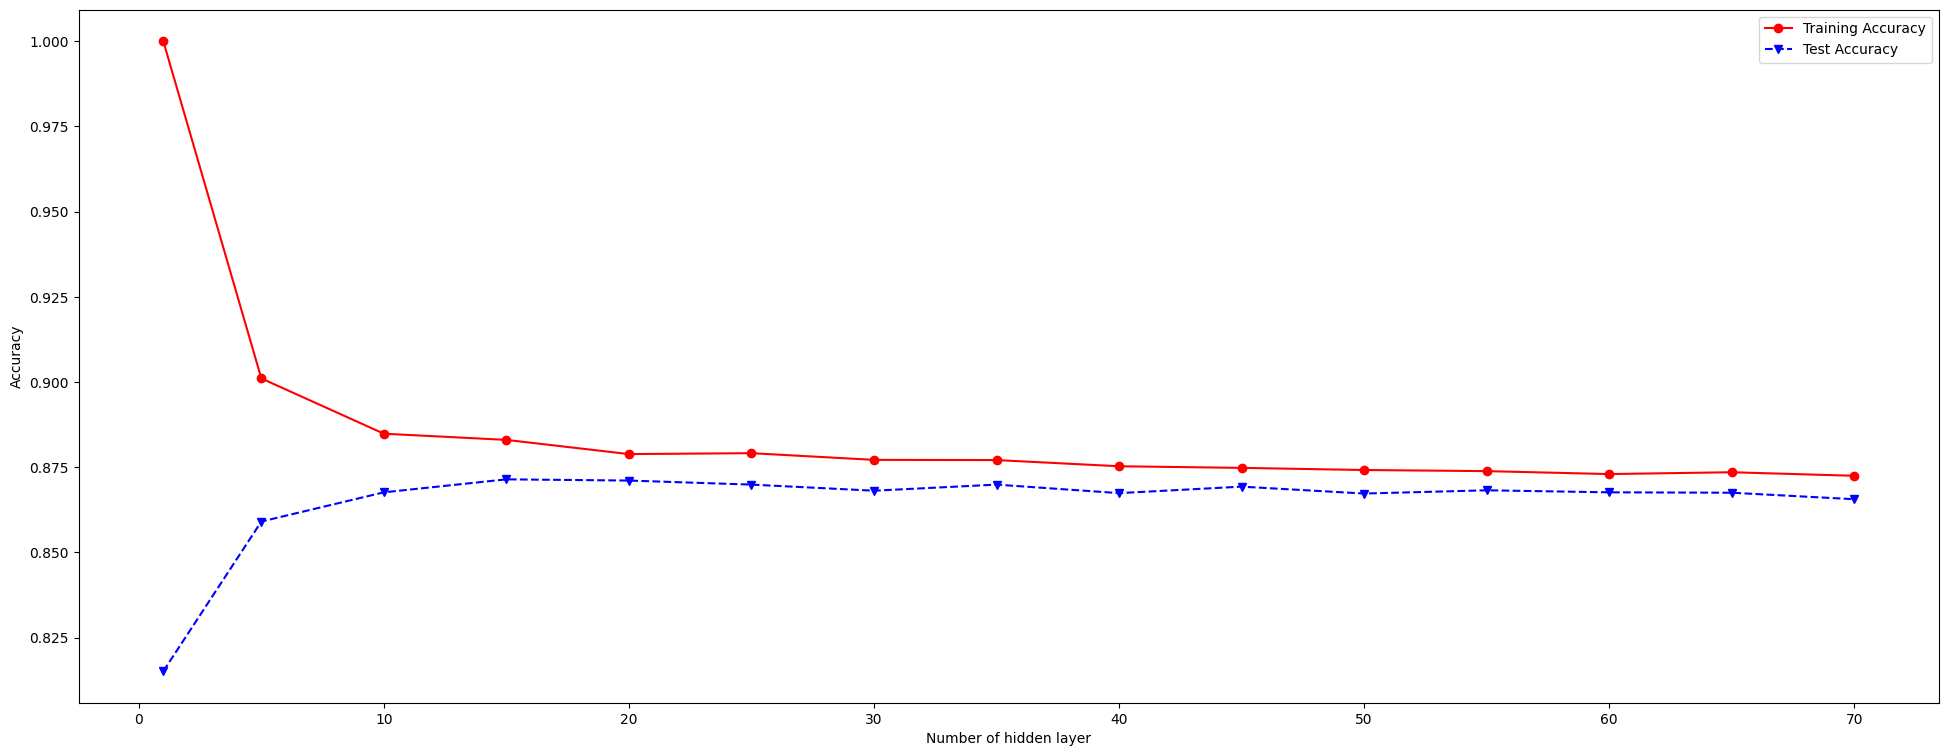

In [49]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

numNeighbors = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train_80_20, Y_train_80_20)
    Y_predTrain = clf.predict(X_train_80_20)
    Y_predTest = clf.predict(X_test_80_20)
    trainAcc.append(accuracy_score(Y_train_80_20, Y_predTrain))
    testAcc.append(accuracy_score(Y_test_80_20, Y_predTest))
    print("Number of Nearest Neighbours: ", k)
    print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))

###########################################################################
# Plot training and test accuracies
##########################################################################
plt.figure(figsize = (24, 9))
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

#### Model Training and Assessment

From the 70:30 and 80:20 splits, we can observe gradual convergence for both 'Training Accuracy' and 'Test Accuracy', with fluctuating convergence from the `numNeighbors` = 20 onwards, with the `numNeighbors` that produces higher 'Test Accuracy' scores being `35` for the 70:30 split and `25` for the 80:20
- `n_neighbors` : `35`, `25`

We will then utilize a confusion matrix as well as classification report to perform an analysis of the model's accuracy based on several metrics (information obtained from [1][2]):
- `accuracy` : The proportion of all classifications that were correct, whether positive or negative
- `precision` : The proportion of all the model's positive classifications that are actually positive
- `recall` :  The proportion of all actual positives that were classified correctly as positives
- `f1-score` : The harmonic mean (a kind of average) of precision and recall, accounts for class-imbalances in dataset

For convenience sake we will utilize the `classification_report` function from the `sklearn.metrics`, which will not only break it down by these metrics by class but also provides us with the `Support` (i.e how many samples are in each class) alongside the `macro avg` (Averages for each class without considering class imbalance) and `weighted avg`(Averages for each class considers class imbalance)

In [50]:
k = 35

clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
clf.fit(X_train_70_30, Y_train_70_30)
Y_predTrain = clf.predict(X_train_70_30)
Y_predTest = clf.predict(X_test_70_30)
print("Number of Nearest Neighbours: ", k)
print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))

training_accuracy.append(accuracy_score(Y_train_70_30, Y_predTrain))
testing_accuracy.append(accuracy_score(Y_test_70_30, Y_predTest))

Number of Nearest Neighbours:  35
Training Accuracy:  0.8764625850340136
Testing Accuracy:  0.8700793650793651


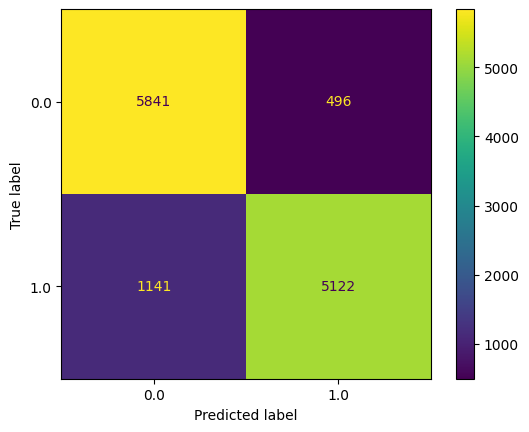

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      6337
         1.0       0.91      0.82      0.86      6263

    accuracy                           0.87     12600
   macro avg       0.87      0.87      0.87     12600
weighted avg       0.87      0.87      0.87     12600



In [51]:
predictions = clf.predict(X_test_70_30)
cm = confusion_matrix(Y_test_70_30, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_70_30, predictions)
print(report)

In [52]:
k = 25

clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
clf.fit(X_train_80_20, Y_train_80_20)
Y_predTrain = clf.predict(X_train_80_20)
Y_predTest = clf.predict(X_test_80_20)
print("Number of Nearest Neighbours: ", k)
print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))

training_accuracy.append(accuracy_score(Y_train_80_20, Y_predTrain))
testing_accuracy.append(accuracy_score(Y_test_80_20, Y_predTest))

Number of Nearest Neighbours:  25
Training Accuracy:  0.8791071428571429
Testing Accuracy:  0.8698809523809524


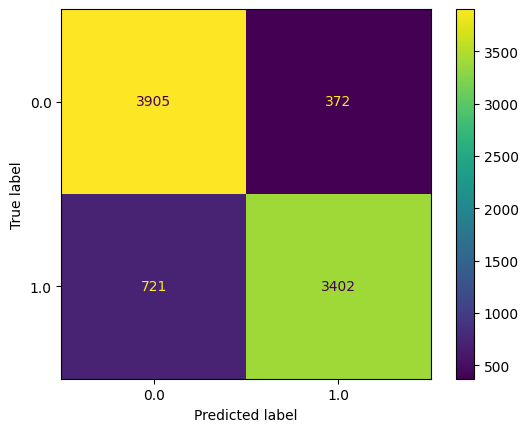

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88      4277
         1.0       0.90      0.83      0.86      4123

    accuracy                           0.87      8400
   macro avg       0.87      0.87      0.87      8400
weighted avg       0.87      0.87      0.87      8400



In [53]:
predictions = clf.predict(X_test_80_20)
cm = confusion_matrix(Y_test_80_20, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_80_20, predictions)
print(report)

#### Conclusion

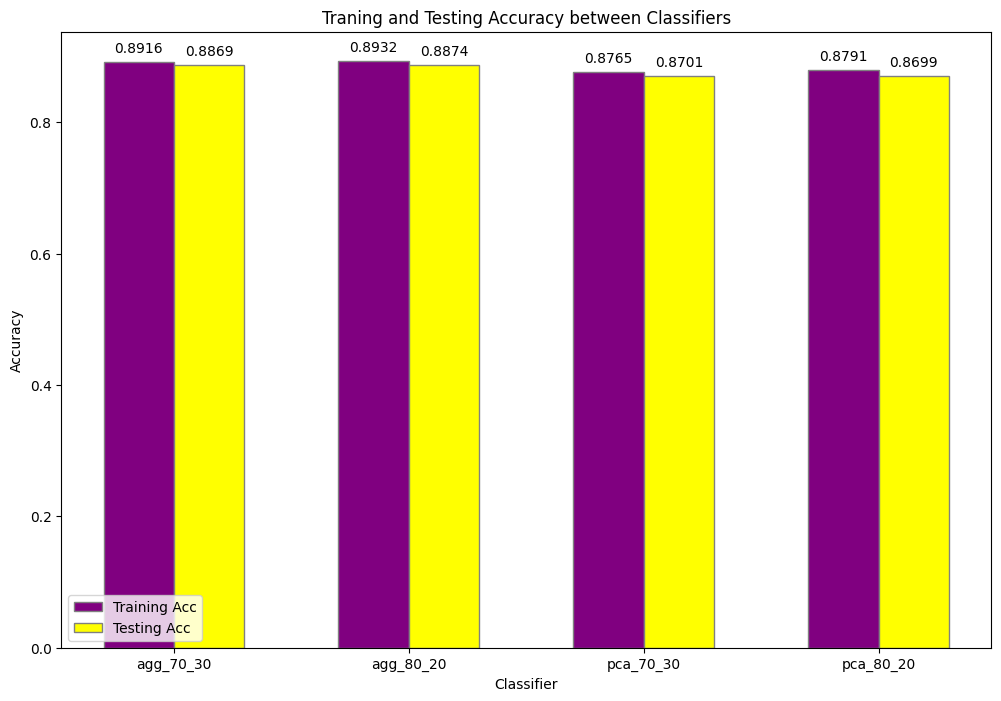

Highest Test Acc. Test set: agg_80_20
Highest Test Acc. value: 0.8873809523809524


In [54]:
barWidth = 0.30
fig = plt.subplots(figsize = (12, 8)) 

testing_label = ['agg_70_30', 'agg_80_20', 'pca_70_30', 'pca_80_20']

# Set position of bar on X axis 
br1 = np.arange(len(training_accuracy)) 
br2 = [x + barWidth for x in br1] 
 
# Make the plot
plt.bar(br1, training_accuracy, color ='purple', width = barWidth, 
        edgecolor ='grey', label ='Training Acc') 
plt.bar(br2, testing_accuracy, color ='yellow', width = barWidth, 
        edgecolor ='grey', label ='Testing Acc') 
 
# Adding Xticks 
plt.xlabel('Classifier') 
plt.ylabel('Accuracy') 
plt.xticks([r + 0.15 for r in range(len(training_accuracy))], 
        testing_label)
plt.title("Traning and Testing Accuracy between Classifiers")

# Add bar labels
for i in range(len(training_accuracy)):
    plt.text(br1[i], training_accuracy[i] + 0.01, 
             f'{training_accuracy[i]:.4f}', ha='center', va='bottom')
    plt.text(br2[i], testing_accuracy[i] + 0.01, 
             f'{testing_accuracy[i]:.4f}', ha='center', va='bottom')
plt.legend()
plt.show() 

print("Highest Test Acc. Test set:", testing_label[testing_accuracy.index(max(testing_accuracy))])
print("Highest Test Acc. value:", max(testing_accuracy))

We are going to select the model trained with the '80:20 training:testing split cir_ncir_agg' dataset with a 'n_neighbors = 60' as it provides us with the (marginally) highest training and testing accuracy. This model will be saved to a pickle file for later usage.

In [57]:
# Select the features to be used for Classification
X = dataset_1.drop(columns = 'NLOS')
Y = dataset_1[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
X_train_80_20, X_test_80_20, Y_train_80_20, Y_test_80_20 = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

k = 25

clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
clf.fit(X_train_80_20, Y_train_80_20)
Y_predTrain = clf.predict(X_train_80_20)
Y_predTest = clf.predict(X_test_80_20)
print("KNN trained with cir_ncir_pca_80_20:")
print("-------------------------------")
print("Number of Nearest Neighbours: ", k)
print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))
print("\n")

save_to_pickle('knn_cir_ncir_agg_80_20', './pickled_models' , clf)

KNN trained with cir_ncir_pca_80_20:
-------------------------------
Number of Nearest Neighbours:  25
Training Accuracy:  0.893154761904762
Testing Accuracy:  0.8873809523809524




<hr>

# <u> References </u>

[1] Google. (n.d.). Classification: Accuracy, recall, precision, and related metrics. Google. https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall (accessed Mar. 16, 2025) <br>
[2] Hyperskill. (n.d.). https://hyperskill.org/learn/step/29339 (accessed Mar. 16, 2025) <br>
